In [ ]:
""""SVMs  -support vector machines - 
1. Classification algorithm
2. kind of most rigorous algorithm - looks for teh extreme cases to classify
3. separted with the help of line of margin (also known as maximum line of margin or Maximum margin hyperplane)
4. the vectors(that ar points in 2d but in 3d or higher , they are combination of points or VECTORS) that are equidistant from the maximum margin
5. Point on the right side - positive hyperplane ; points on the left side-  negative hyperplane
6. The ones that belong to the extreme cases of misclassification - are the supporting vectors"""

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('E://Gaurav/ML_Dataset/Decision_Tree/Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [4]:
# dividing the data into training and test data:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [5]:
# feature Scaling

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler() 
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)  

# feature scaling important since we need to predict precisely"""

In [6]:
# Fiting the regression

from sklearn.svm import SVC

In [43]:
classifier = SVC(kernel = 'linear',  random_state = 0)  # Kernal used here is Linear (which will function somewhat liek linear classifier)

In [44]:
classifier.fit(x_train,y_train) # model fitted to train set

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
# Predicting the Test Result

y_pred = classifier.predict(x_test)

In [46]:
# creating a confusion matrix

from sklearn.metrics import confusion_matrix  # this is a function and not a class !!!(CLasses are written in CAPS)

cm = confusion_matrix(y_test,y_pred)

In [47]:
cm

array([[66,  2],
       [19, 13]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


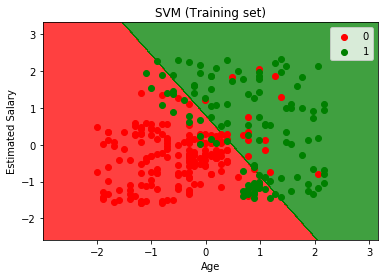

In [36]:
# Visualizing the Training set result

from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Visualizing the Test set result

from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# But sometimes, the data is not linealy separable.
# cant draw LINEAR separable boundary
# SO there are a set of mathematical functions called KERNELS taht take up the input and transform the non linear data into a linear separable one

In [ ]:
""""Different kernels to work upon:
1. classifier = SVC(kernel = 'rbf', random_state = 0) 
2. classifier = SVC(kernel = 'sigmmoid', random_state = 0) 
3. classifier = SVC(kernel = 'poly', degree = 2, random_state = 0) # we can try with different degrees of polynomial """